## *Breast Cancer Classification with a Simple Neural Network*

## Importing the Dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

In [7]:
# loading the dataset
df = pd.read_csv('data.csv')

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [17]:
# number of rows and columns in the dataset
df.shape

(569, 31)

In [84]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [25]:
df["diagnosis"] = df["diagnosis"].replace({"B": 1, "M": 0})

In [27]:
# Statisticsl measures about the data
df.drop(columns = 'diagnosis').describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [31]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Separating the feature and target

In [35]:
X = df.drop(columns = 'diagnosis', axis = 1)
y = df['diagnosis']

In [37]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [39]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [98]:
# Splitting into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


## Building the Neural Network

In [103]:
# importing libraries for NN

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras

In [105]:
# Setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [107]:
# compiling the Neural Network

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [109]:
# training the neural network

history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8041 - loss: 3.1075 - val_accuracy: 0.9783 - val_loss: 0.0427
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9201 - loss: 0.6582 - val_accuracy: 0.9783 - val_loss: 0.0633
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9035 - loss: 0.6091 - val_accuracy: 0.9783 - val_loss: 0.0822
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9206 - loss: 0.6879 - val_accuracy: 0.9348 - val_loss: 0.1167
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9090 - loss: 0.5096 - val_accuracy: 0.9783 - val_loss: 0.0400
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9138 - loss: 0.5645 - val_accuracy: 0.9783 - val_loss: 0.0401
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9224 - loss: 0.4939 - val_accuracy: 0.9783 - val_loss: 0.0334
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9232 - loss: 0.4936 - val_accuracy: 0.9783 - v

### Standardize the data

In [112]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [116]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [118]:
# training the neural network

history = model.fit(X_train_std, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7278 - loss: 0.5573 - val_accuracy: 0.9130 - val_loss: 0.3046
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8549 - loss: 0.3320 - val_accuracy: 0.9348 - val_loss: 0.1958
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8964 - loss: 0.2410 - val_accuracy: 0.9565 - val_loss: 0.1590
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9073 - loss: 0.1973 - val_accuracy: 0.9783 - val_loss: 0.1412
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9085 - loss: 0.1713 - val_accuracy: 0.9783 - val_loss: 0.1304
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9285 - loss: 0.1530 - val_accuracy: 0.9783 - val_loss: 0.1227
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9378 - loss: 0.1384 - val_accuracy: 0.9783 - val_loss: 0.1167
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9404 - loss: 0.1264 - val_accuracy: 0.9783 - v

## Visualizing accuracy and loss

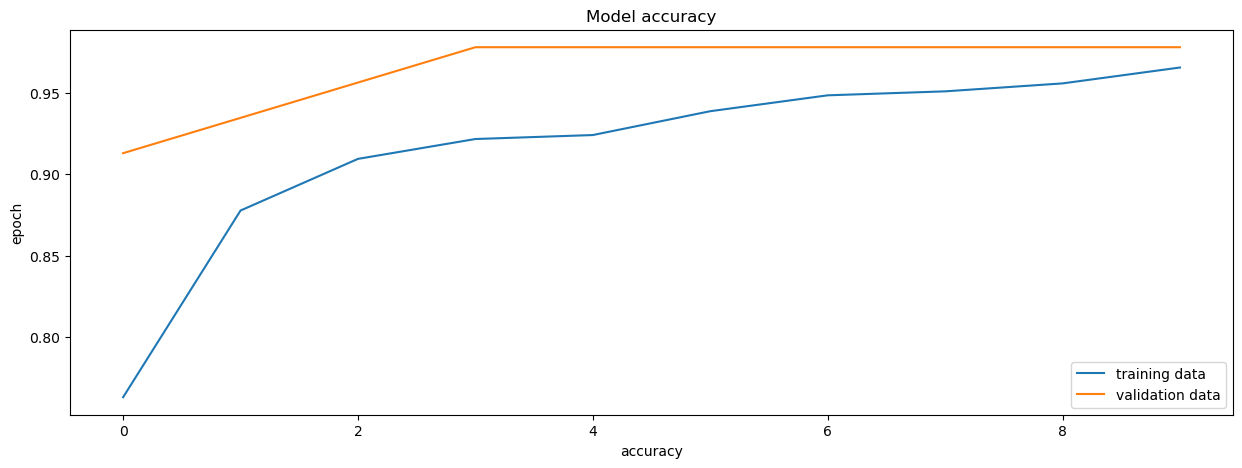

In [123]:
plt.figure(figsize = (15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

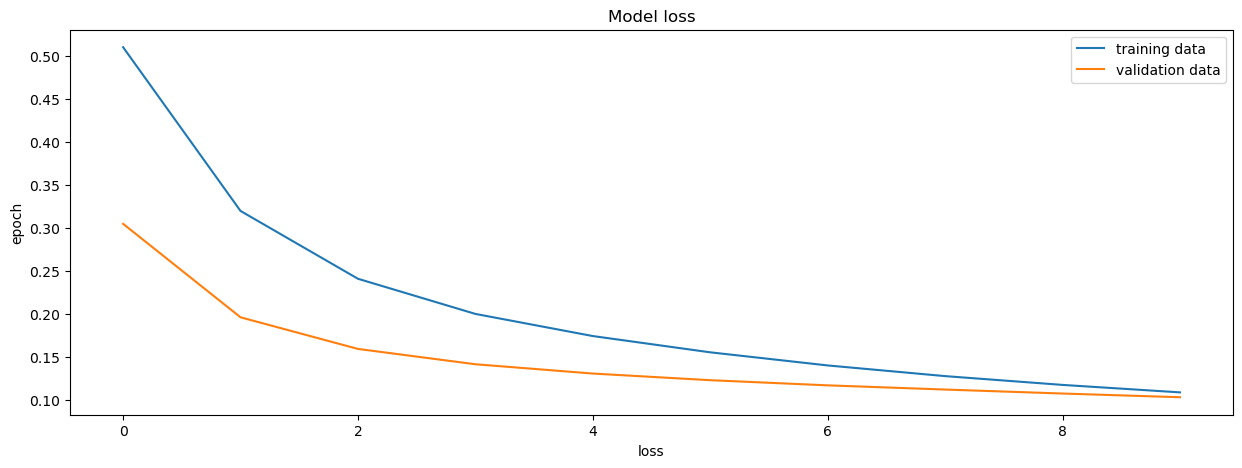

In [125]:
plt.figure(figsize = (15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')

## Accuracy value of the model on test data

In [129]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9857 - loss: 0.1112
0.9824561476707458


In [139]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [133]:
y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [137]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.49408177 0.75226647]


In [141]:
print(X_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
528       13.940         13.17           90.31      594.2          0.12480   
291       14.960         19.10           97.03      687.3          0.08992   
467        9.668         18.10           61.06      286.3          0.08311   
108       22.270         19.67          152.80     1509.0          0.13260   
340       14.420         16.54           94.15      641.2          0.09751   
..           ...           ...             ...        ...              ...   
471       12.040         28.14           76.85      449.9          0.08752   
449       21.100         20.52          138.10     1384.0          0.09684   
24        16.650         21.38          110.00      904.6          0.11210   
38        14.990         25.20           95.54      698.8          0.09387   
230       17.050         19.08          113.40      895.0          0.11410   

     compactness_mean  concavity_mean  concave points_mean  sym

In [143]:
print(y_pred)

[[0.49408177 0.75226647]
 [0.47989982 0.5567239 ]
 [0.20174712 0.9935531 ]
 [0.9991572  0.00104844]
 [0.44748873 0.46024454]
 [0.94157124 0.0349743 ]
 [0.4873852  0.8550675 ]
 [0.14603263 0.989929  ]
 [0.19966117 0.9655274 ]
 [0.3250302  0.918385  ]
 [0.65885234 0.5644926 ]
 [0.18078402 0.8410777 ]
 [0.5590687  0.9325859 ]
 [0.3063528  0.87056226]
 [0.39609954 0.979722  ]
 [0.96081823 0.1555477 ]
 [0.30594215 0.9544337 ]
 [0.10595017 0.95719695]
 [0.40465128 0.9866709 ]
 [0.8567191  0.04230606]
 [0.03395483 0.41870493]
 [0.21242374 0.96878195]
 [0.36708805 0.9585825 ]
 [0.14157158 0.9826489 ]
 [0.36643335 0.6946561 ]
 [0.8073677  0.12392171]
 [0.19666377 0.9361127 ]
 [0.21051843 0.81255156]
 [0.8950909  0.16018009]
 [0.9279269  0.16865379]
 [0.40073147 0.73707163]
 [0.25351495 0.9473784 ]
 [0.21967079 0.9155401 ]
 [0.9994532  0.02737211]
 [0.92271274 0.13266696]
 [0.3685099  0.7850182 ]
 [0.25479627 0.99547833]
 [0.3575134  0.9053235 ]
 [0.09965884 0.9822478 ]
 [0.11926324 0.91104496]


In [145]:
# argmax function

my_list = [10, 20, 30]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[10, 20, 30]
2


In [147]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


## Building the predictive system

In [150]:
input_data = (19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,
              0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,
              0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Transform the input data
input_data_std = scaler.transform(input_data_reshape)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.9780103  0.04215929]]
[0]
The tumor is Malignant
